# Detecting Screens in an Image Using Fourier Transformations

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

from win32api import GetSystemMetrics

def get_resized_for_display_img(img):
    # Get screen size
    screen_w, screen_h = GetSystemMetrics(0), GetSystemMetrics(1)
    
    # Calculate resize factor
    h, w, = img.shape
    if h > screen_h or w > screen_w:
        if h / screen_h >= w / screen_w:
            resize_factor = screen_h / h
        else:
            resize_factor = screen_w / w
        h, w = int(h * resize_factor), int(w * resize_factor)
    
    # Resize the image
    resized_img = cv2.resize(img, (w, h))
    return resized_img

def fourier_transform(img):
    # Load the image
    image = cv2.imread(img, cv2.IMREAD_GRAYSCALE)

    # # Apply simple thresholding
    # threshold_value = 127 # Adjust based on your image
    # _, binary_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)
    # Apply adaptive thresholding
    # binary_image = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    # # Apply Otsu's thresholding
    # _, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # # Plot
    plt.imshow(image, cmap='gray')
    plt.title(f'Magnitude Spectrum, DFT; Image_{i}')
    plt.show()

    # Compute the DFT
    dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
    # Shift the zero-frequency component to the center
    dft_shift = np.fft.fftshift(dft)
    # Compute the magnitude spectrum
    magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))
    magnitude_spectrum += np.ones(magnitude_spectrum.shape, dtype=magnitude_spectrum.dtype) # Add 1 to avoid log(0)
    cv2.log(magnitude_spectrum, magnitude_spectrum)
    # Normalize the logarithmic scaled image for display
    cv2.normalize(magnitude_spectrum, magnitude_spectrum, 0, 1, cv2.NORM_MINMAX)

    # # Plot
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title(f'Magnitude Spectrum, DFT; Image_{i}')
    plt.show()

    print(f'Magnitude Spectrum for image_{i}: {magnitude_spectrum}')

    # # Apply FFT
    # f = np.fft.fft2(image)
    # fshift = np.fft.fftshift(f)
    # magnitude_spectrum = 20 * np.log(np.abs(fshift))
    # # Ensure the array is contiguous
    # magnitude_spectrum = np.ascontiguousarray(magnitude_spectrum, dtype=np.float32)
    # # Now apply the log operation
    # cv2.log(magnitude_spectrum, magnitude_spectrum)
    # # Normalize the logarithmic scaled image for display
    # cv2.normalize(magnitude_spectrum, magnitude_spectrum, 0, 1, cv2.NORM_MINMAX)
    # # Plot
    # plt.imshow(magnitude_spectrum, cmap='gray')
    # plt.title(f'Magnitude Spectrum, FFT; Image_{i}')
    # plt.show()

### Screen Images

['forged\\20240327_114449.jpg', 'forged\\20240327_114542.jpg', 'forged\\20240327_114621.jpg', 'forged\\20240327_114735.jpg', 'forged\\20240327_114742.jpg', 'forged\\20240327_114745.jpg', 'forged\\20240327_114750.jpg', 'forged\\20240327_114752.jpg', 'forged\\20240327_114754.jpg']


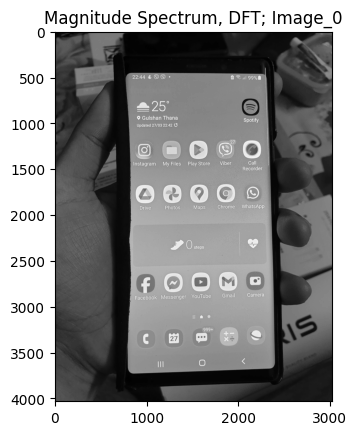

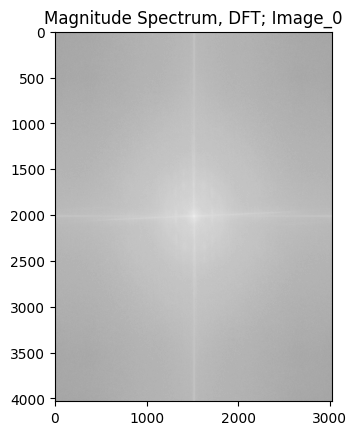

Magnitude Spectrum for image_0: [[0.6823945  0.6013796  0.6589549  ... 0.67145544 0.6589549  0.6013796 ]
 [0.61897594 0.67290026 0.66195226 ... 0.6839866  0.6818424  0.65554976]
 [0.6864824  0.6561556  0.66177994 ... 0.54607964 0.6416663  0.65404844]
 ...
 [0.6797836  0.6673111  0.6597923  ... 0.66770035 0.6679366  0.6465223 ]
 [0.6864824  0.65404844 0.6416663  ... 0.69189024 0.66177994 0.6561556 ]
 [0.61897594 0.65554976 0.6818424  ... 0.6336199  0.66195226 0.67290026]]


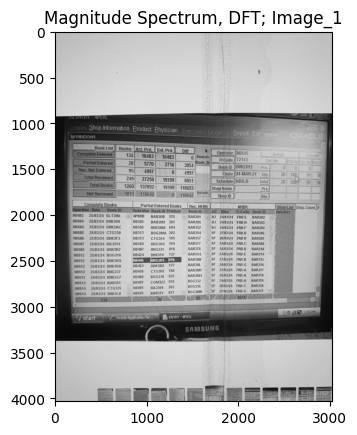

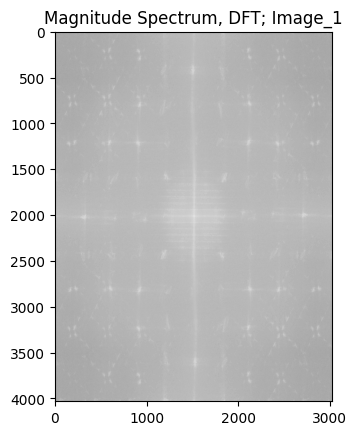

Magnitude Spectrum for image_1: [[0.7643741  0.71850497 0.74551034 ... 0.65373874 0.74551034 0.71850497]
 [0.735482   0.686016   0.7321008  ... 0.6918885  0.7258065  0.7435233 ]
 [0.75450015 0.7271481  0.7007976  ... 0.681606   0.6707906  0.7254367 ]
 ...
 [0.7248624  0.7414792  0.66665804 ... 0.6596613  0.71037203 0.7403937 ]
 [0.75450015 0.7254367  0.6707906  ... 0.6946646  0.7007976  0.7271481 ]
 [0.735482   0.7435233  0.7258065  ... 0.663328   0.7321008  0.686016  ]]


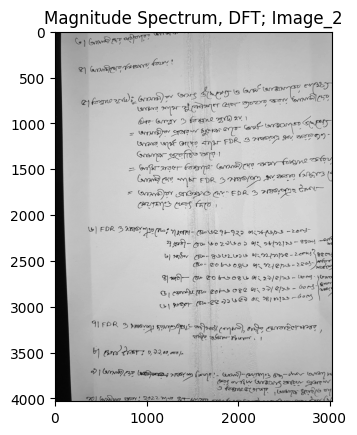

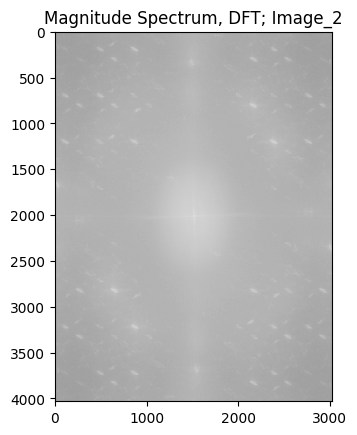

Magnitude Spectrum for image_2: [[0.7665931  0.7381577  0.6814181  ... 0.69181335 0.6814181  0.7381577 ]
 [0.7526193  0.74328583 0.61989796 ... 0.6842985  0.69210595 0.7121324 ]
 [0.71253085 0.7232849  0.6803076  ... 0.6864832  0.67786556 0.7004408 ]
 ...
 [0.6963338  0.67810994 0.68638355 ... 0.63600177 0.66221565 0.66650003]
 [0.71253085 0.7004408  0.67786556 ... 0.541213   0.6803076  0.7232849 ]
 [0.7526193  0.7121324  0.69210595 ... 0.68716383 0.61989796 0.74328583]]


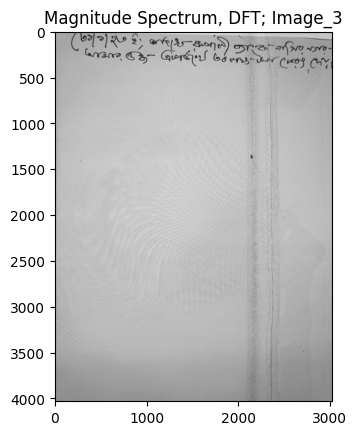

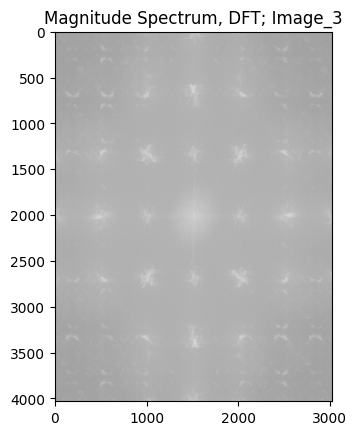

Magnitude Spectrum for image_3: [[0.7300209  0.76591486 0.7158759  ... 0.7070572  0.7158759  0.76591486]
 [0.76090026 0.75523865 0.7271603  ... 0.69609904 0.6961483  0.7581863 ]
 [0.75671905 0.74220765 0.73244745 ... 0.58490497 0.654889   0.7187701 ]
 ...
 [0.7187662  0.70136327 0.68583226 ... 0.6413404  0.73248565 0.74380237]
 [0.75671905 0.7187701  0.654889   ... 0.70831126 0.73244745 0.74220765]
 [0.7609     0.7581863  0.6961483  ... 0.7117346  0.7271603  0.75523865]]


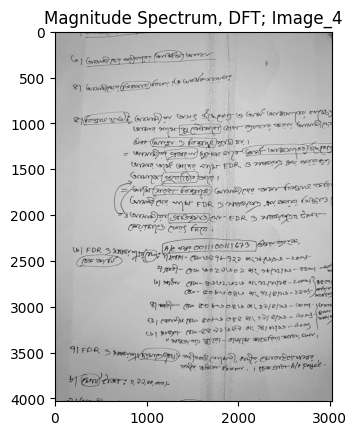

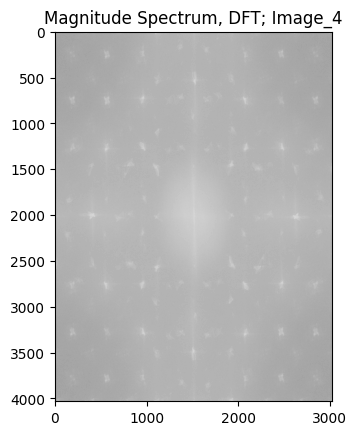

Magnitude Spectrum for image_4: [[0.75848985 0.7797867  0.7389555  ... 0.73346287 0.7389555  0.7797867 ]
 [0.7761991  0.7678418  0.63731015 ... 0.73233086 0.7296497  0.7688726 ]
 [0.7615201  0.74237925 0.68694985 ... 0.6984872  0.7069227  0.7326204 ]
 ...
 [0.6744636  0.72263473 0.7291306  ... 0.6910455  0.73153895 0.7247628 ]
 [0.7615201  0.7326204  0.7069227  ... 0.7013817  0.68694985 0.74237925]
 [0.7761991  0.7688726  0.7296497  ... 0.7189772  0.63731015 0.7678418 ]]


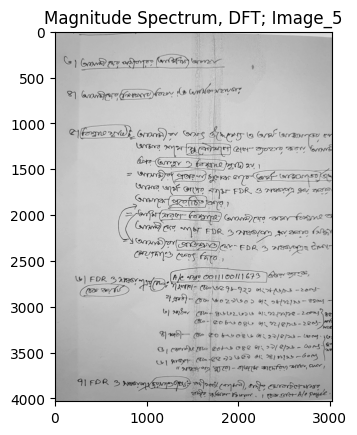

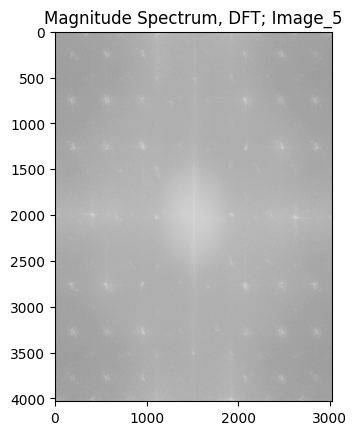

Magnitude Spectrum for image_5: [[0.6950917  0.7272304  0.73339975 ... 0.7233802  0.73339975 0.7272304 ]
 [0.72567225 0.7255543  0.7344442  ... 0.72266877 0.73328966 0.73250747]
 [0.7312055  0.7337891  0.73198956 ... 0.71381706 0.72027814 0.7310741 ]
 ...
 [0.7251907  0.71279013 0.6941026  ... 0.7130557  0.72729594 0.7255268 ]
 [0.7312055  0.7310741  0.72027814 ... 0.7230681  0.73198956 0.7337891 ]
 [0.72567225 0.73250747 0.73328966 ... 0.7264033  0.7344442  0.7255543 ]]


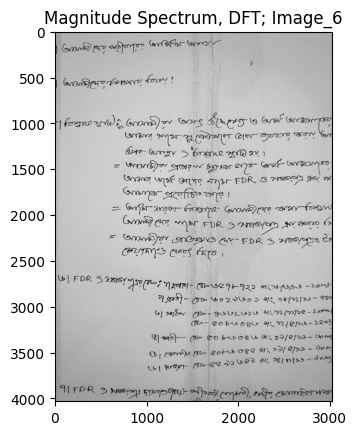

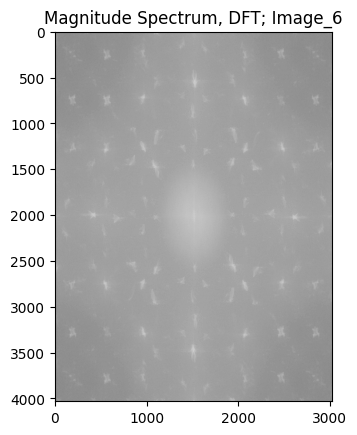

Magnitude Spectrum for image_6: [[0.6639557  0.71154594 0.5806445  ... 0.6685492  0.5806445  0.71154594]
 [0.7127307  0.69248456 0.54924214 ... 0.6545175  0.62099594 0.71291554]
 [0.69887656 0.6667645  0.60486144 ... 0.596754   0.6107588  0.68372256]
 ...
 [0.61266965 0.6232592  0.6253096  ... 0.598745   0.6406837  0.61733896]
 [0.69887656 0.68372256 0.6107588  ... 0.6073378  0.60486144 0.6667645 ]
 [0.7127307  0.71291554 0.62099594 ... 0.6631198  0.54924214 0.69248456]]


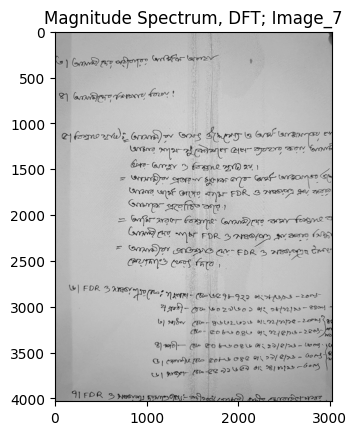

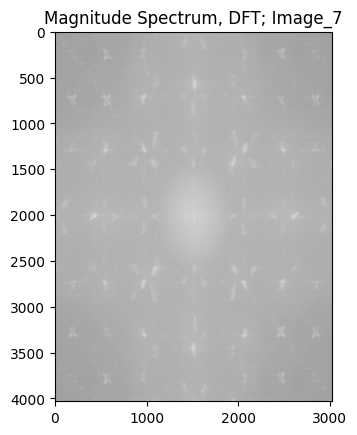

Magnitude Spectrum for image_7: [[0.72800684 0.77085143 0.733329   ... 0.7358553  0.733329   0.77085143]
 [0.7623826  0.7670832  0.6687687  ... 0.7378957  0.7222492  0.7582512 ]
 [0.7587152  0.75073004 0.6859797  ... 0.7161398  0.6805119  0.72988486]
 ...
 [0.72349155 0.64261913 0.6822221  ... 0.63287735 0.711983   0.7173562 ]
 [0.7587152  0.72988486 0.6805119  ... 0.7020432  0.6859797  0.75073004]
 [0.7623826  0.7582512  0.7222492  ... 0.7190095  0.6687687  0.7670832 ]]


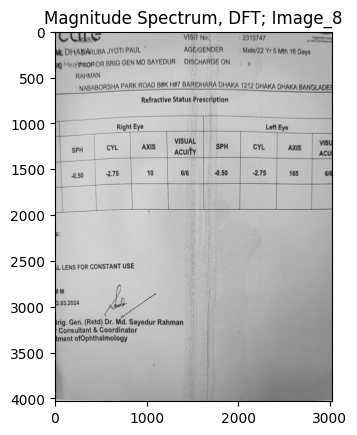

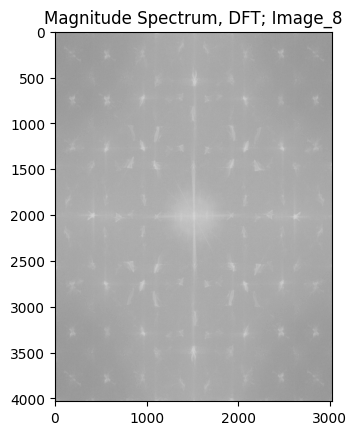

Magnitude Spectrum for image_8: [[0.6198662  0.7470472  0.71004    ... 0.70067793 0.71004    0.7470472 ]
 [0.73831564 0.73656344 0.68337166 ... 0.69100153 0.6982955  0.74418455]
 [0.74289894 0.7278741  0.6304583  ... 0.65086424 0.6923627  0.7185337 ]
 ...
 [0.7048733  0.68987054 0.6136717  ... 0.64741707 0.69509    0.6442574 ]
 [0.74289894 0.7185337  0.6923627  ... 0.6693428  0.6304583  0.7278741 ]
 [0.73831564 0.74418455 0.6982955  ... 0.7023625  0.68337166 0.73656344]]


In [2]:
# All images
screen_images = [os.path.join("forged", img) for img in os.listdir('forged')]
print(screen_images)

for i in range(len(screen_images)):
    fourier_transform(screen_images[i])

### Real Images

['real\\20240327_114941.jpg', 'real\\20240327_114945.jpg', 'real\\20240327_114950.jpg']


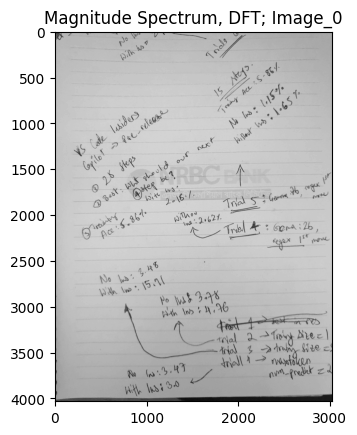

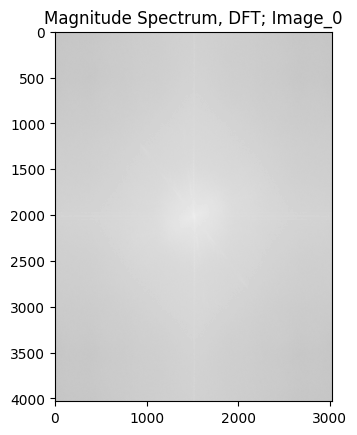

Magnitude Spectrum for image_0: [[0.8275166  0.76443225 0.8031812  ... 0.79762477 0.8031812  0.76443225]
 [0.7728454  0.7804725  0.7801942  ... 0.7751588  0.79264176 0.7905981 ]
 [0.7538557  0.7696448  0.7862428  ... 0.74958444 0.790355   0.7413203 ]
 ...
 [0.7949287  0.79674333 0.77784866 ... 0.7556637  0.7639601  0.7744564 ]
 [0.7538558  0.7413203  0.790355   ... 0.7407063  0.7862428  0.7696448 ]
 [0.7728454  0.7905981  0.79264176 ... 0.7692483  0.7801942  0.7804725 ]]


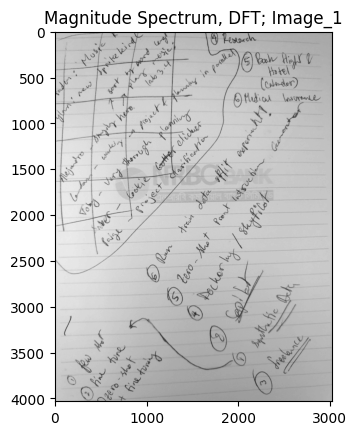

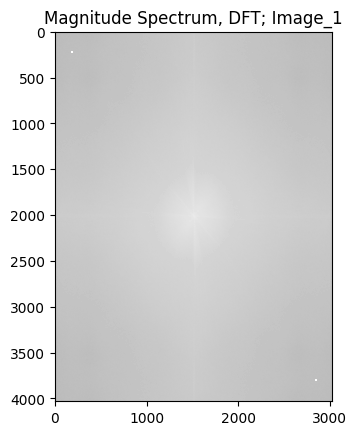

Magnitude Spectrum for image_1: [[0.79679984 0.74556565 0.76228815 ... 0.74652123 0.76228815 0.74556565]
 [0.73993015 0.7480078  0.72142774 ... 0.6925136  0.7338105  0.6967367 ]
 [0.73506325 0.6926135  0.73527646 ... 0.7710871  0.7328661  0.7309448 ]
 ...
 [0.75176024 0.7432784  0.7529248  ... 0.75206554 0.7560774  0.7443069 ]
 [0.73506325 0.7309448  0.7328661  ... 0.7382892  0.73527646 0.6926135 ]
 [0.73993015 0.6967367  0.7338105  ... 0.7155814  0.72142774 0.7480078 ]]


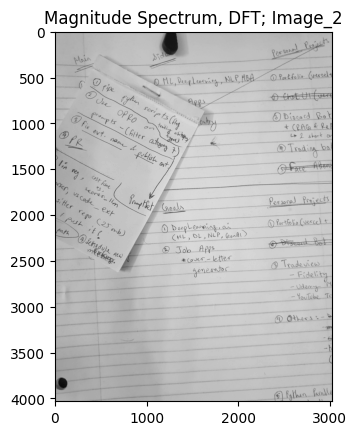

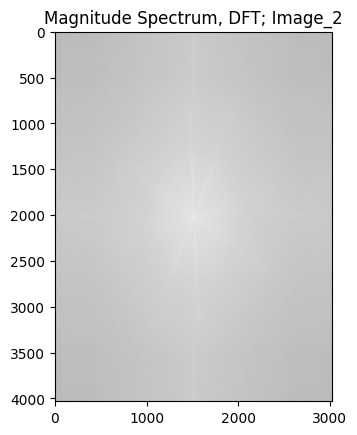

Magnitude Spectrum for image_2: [[0.7763694  0.7403268  0.74864936 ... 0.7544849  0.74864936 0.7403268 ]
 [0.75384605 0.72670597 0.7460755  ... 0.7284505  0.7419898  0.7590282 ]
 [0.7447034  0.75979024 0.75077045 ... 0.75781095 0.7361157  0.6733473 ]
 ...
 [0.7339347  0.74360555 0.7438339  ... 0.755137   0.7259167  0.7491915 ]
 [0.7447034  0.6733473  0.7361157  ... 0.7333284  0.75077045 0.75979024]
 [0.75384605 0.7590282  0.7419898  ... 0.76267534 0.7460755  0.72670597]]


In [3]:
# All images
real_images = [os.path.join("real", img) for img in os.listdir('real')]
print(real_images)

for i in range(len(real_images)):
    fourier_transform(real_images[i])